In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 20]

In [2]:
names=["id number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Diagnosis"]
wisconsinDiagnosis0 = pd.read_csv("../data/breast-cancer-wisconsin.csv", sep=",", names=names, na_values=["?"])

In [3]:
wisconsinDiagnosis0

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [4]:
wisconsinDiagnosis0.describe()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


array([[<AxesSubplot: title={'center': 'id number'}>,
        <AxesSubplot: title={'center': 'Clump Thickness'}>,
        <AxesSubplot: title={'center': 'Uniformity of Cell Size'}>],
       [<AxesSubplot: title={'center': 'Uniformity of Cell Shape'}>,
        <AxesSubplot: title={'center': 'Marginal Adhesion'}>,
        <AxesSubplot: title={'center': 'Single Epithelial Cell Size'}>],
       [<AxesSubplot: title={'center': 'Bare Nuclei'}>,
        <AxesSubplot: title={'center': 'Bland Chromatin'}>,
        <AxesSubplot: title={'center': 'Normal Nucleoli'}>],
       [<AxesSubplot: title={'center': 'Mitoses'}>,
        <AxesSubplot: title={'center': 'Diagnosis'}>, <AxesSubplot: >]],
      dtype=object)

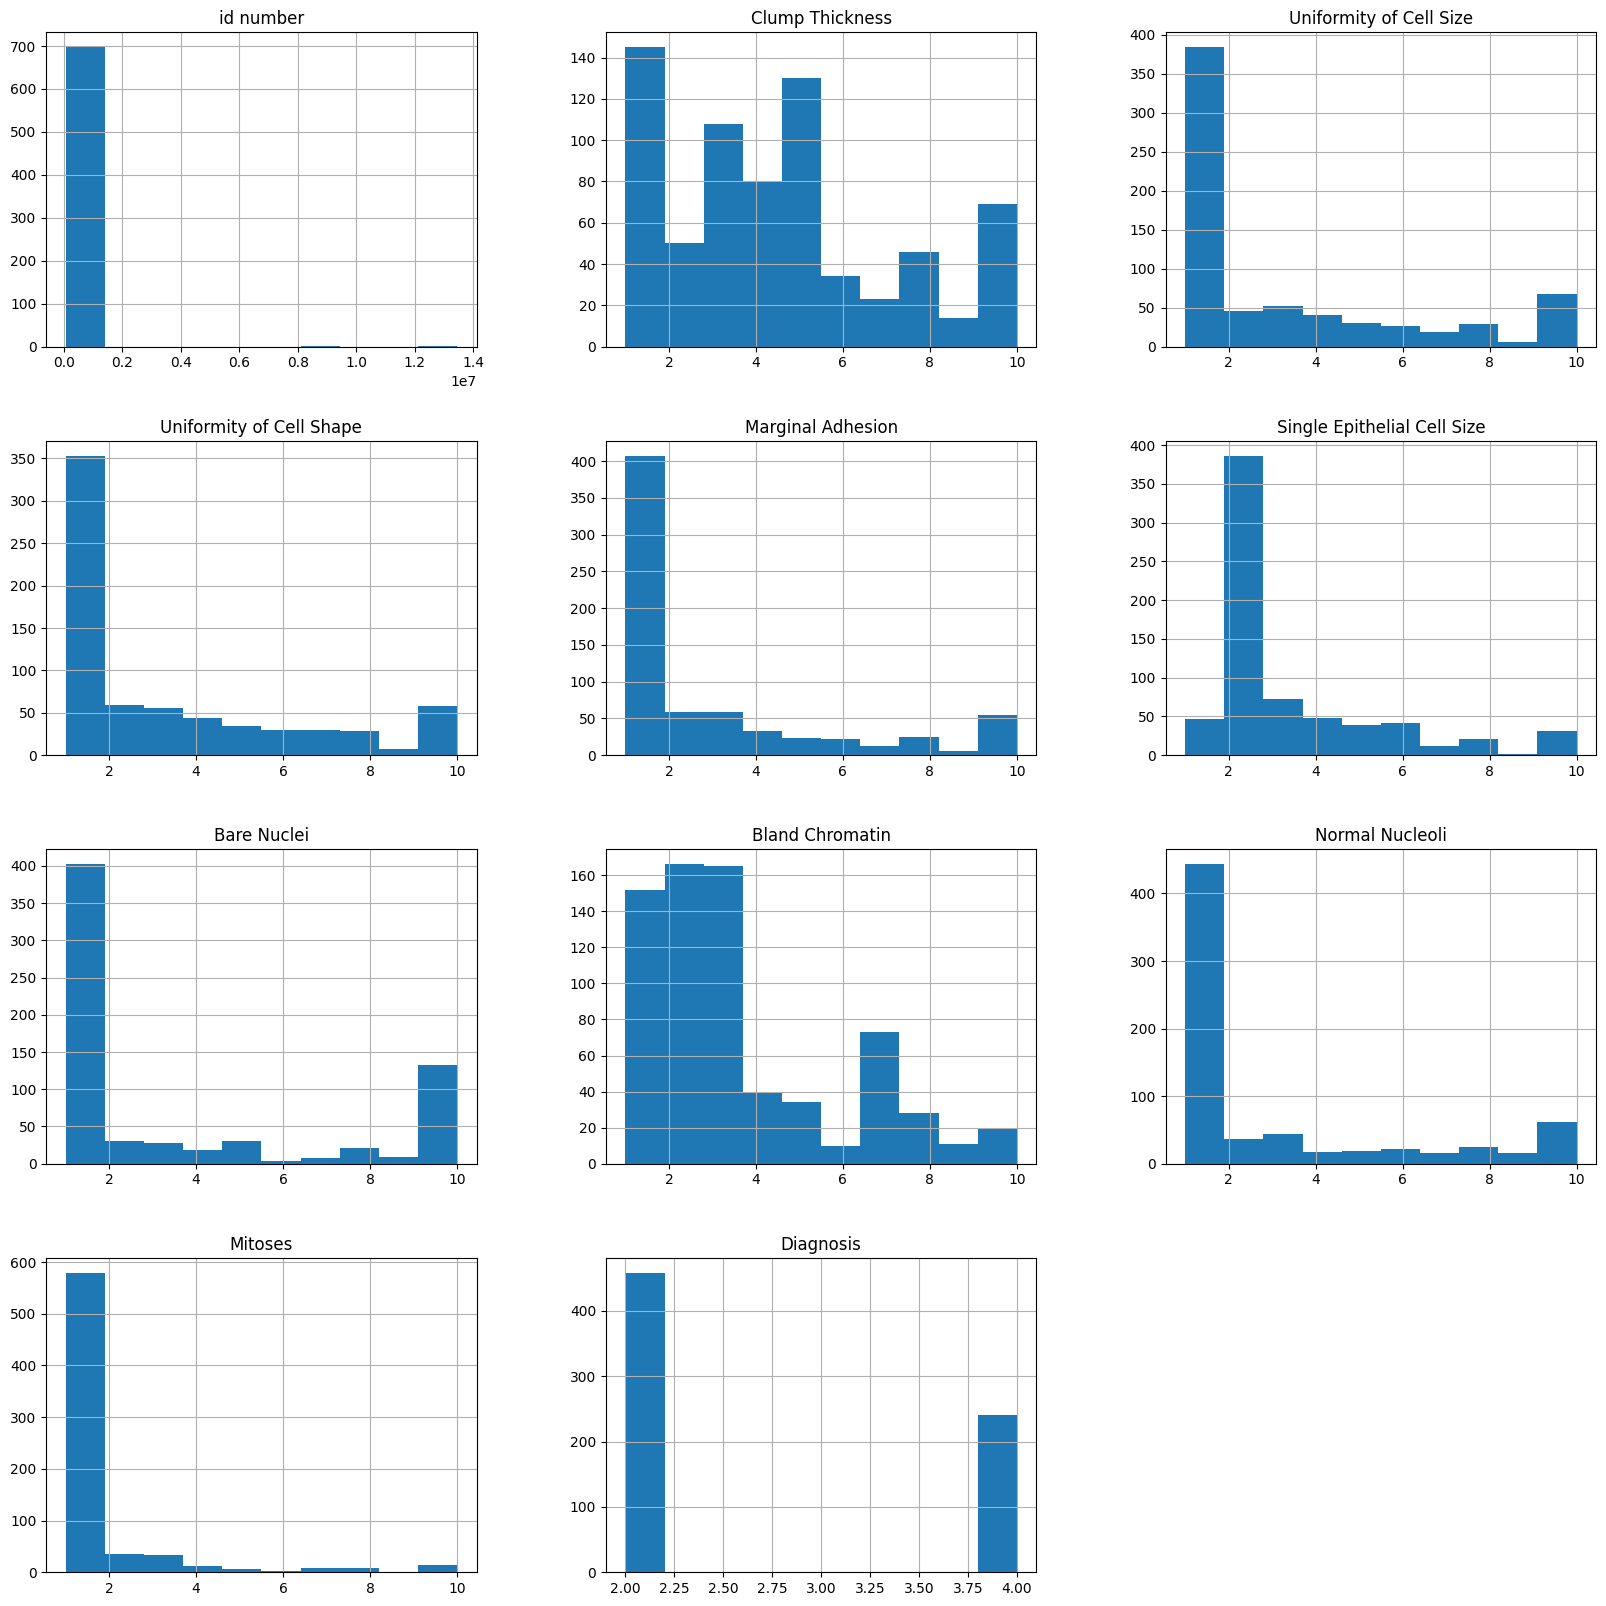

In [5]:
wisconsinDiagnosis0.hist()

In [6]:
wisconsinDiagnosis0.isna().astype(int).sum()

id number                       0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Diagnosis                       0
dtype: int64

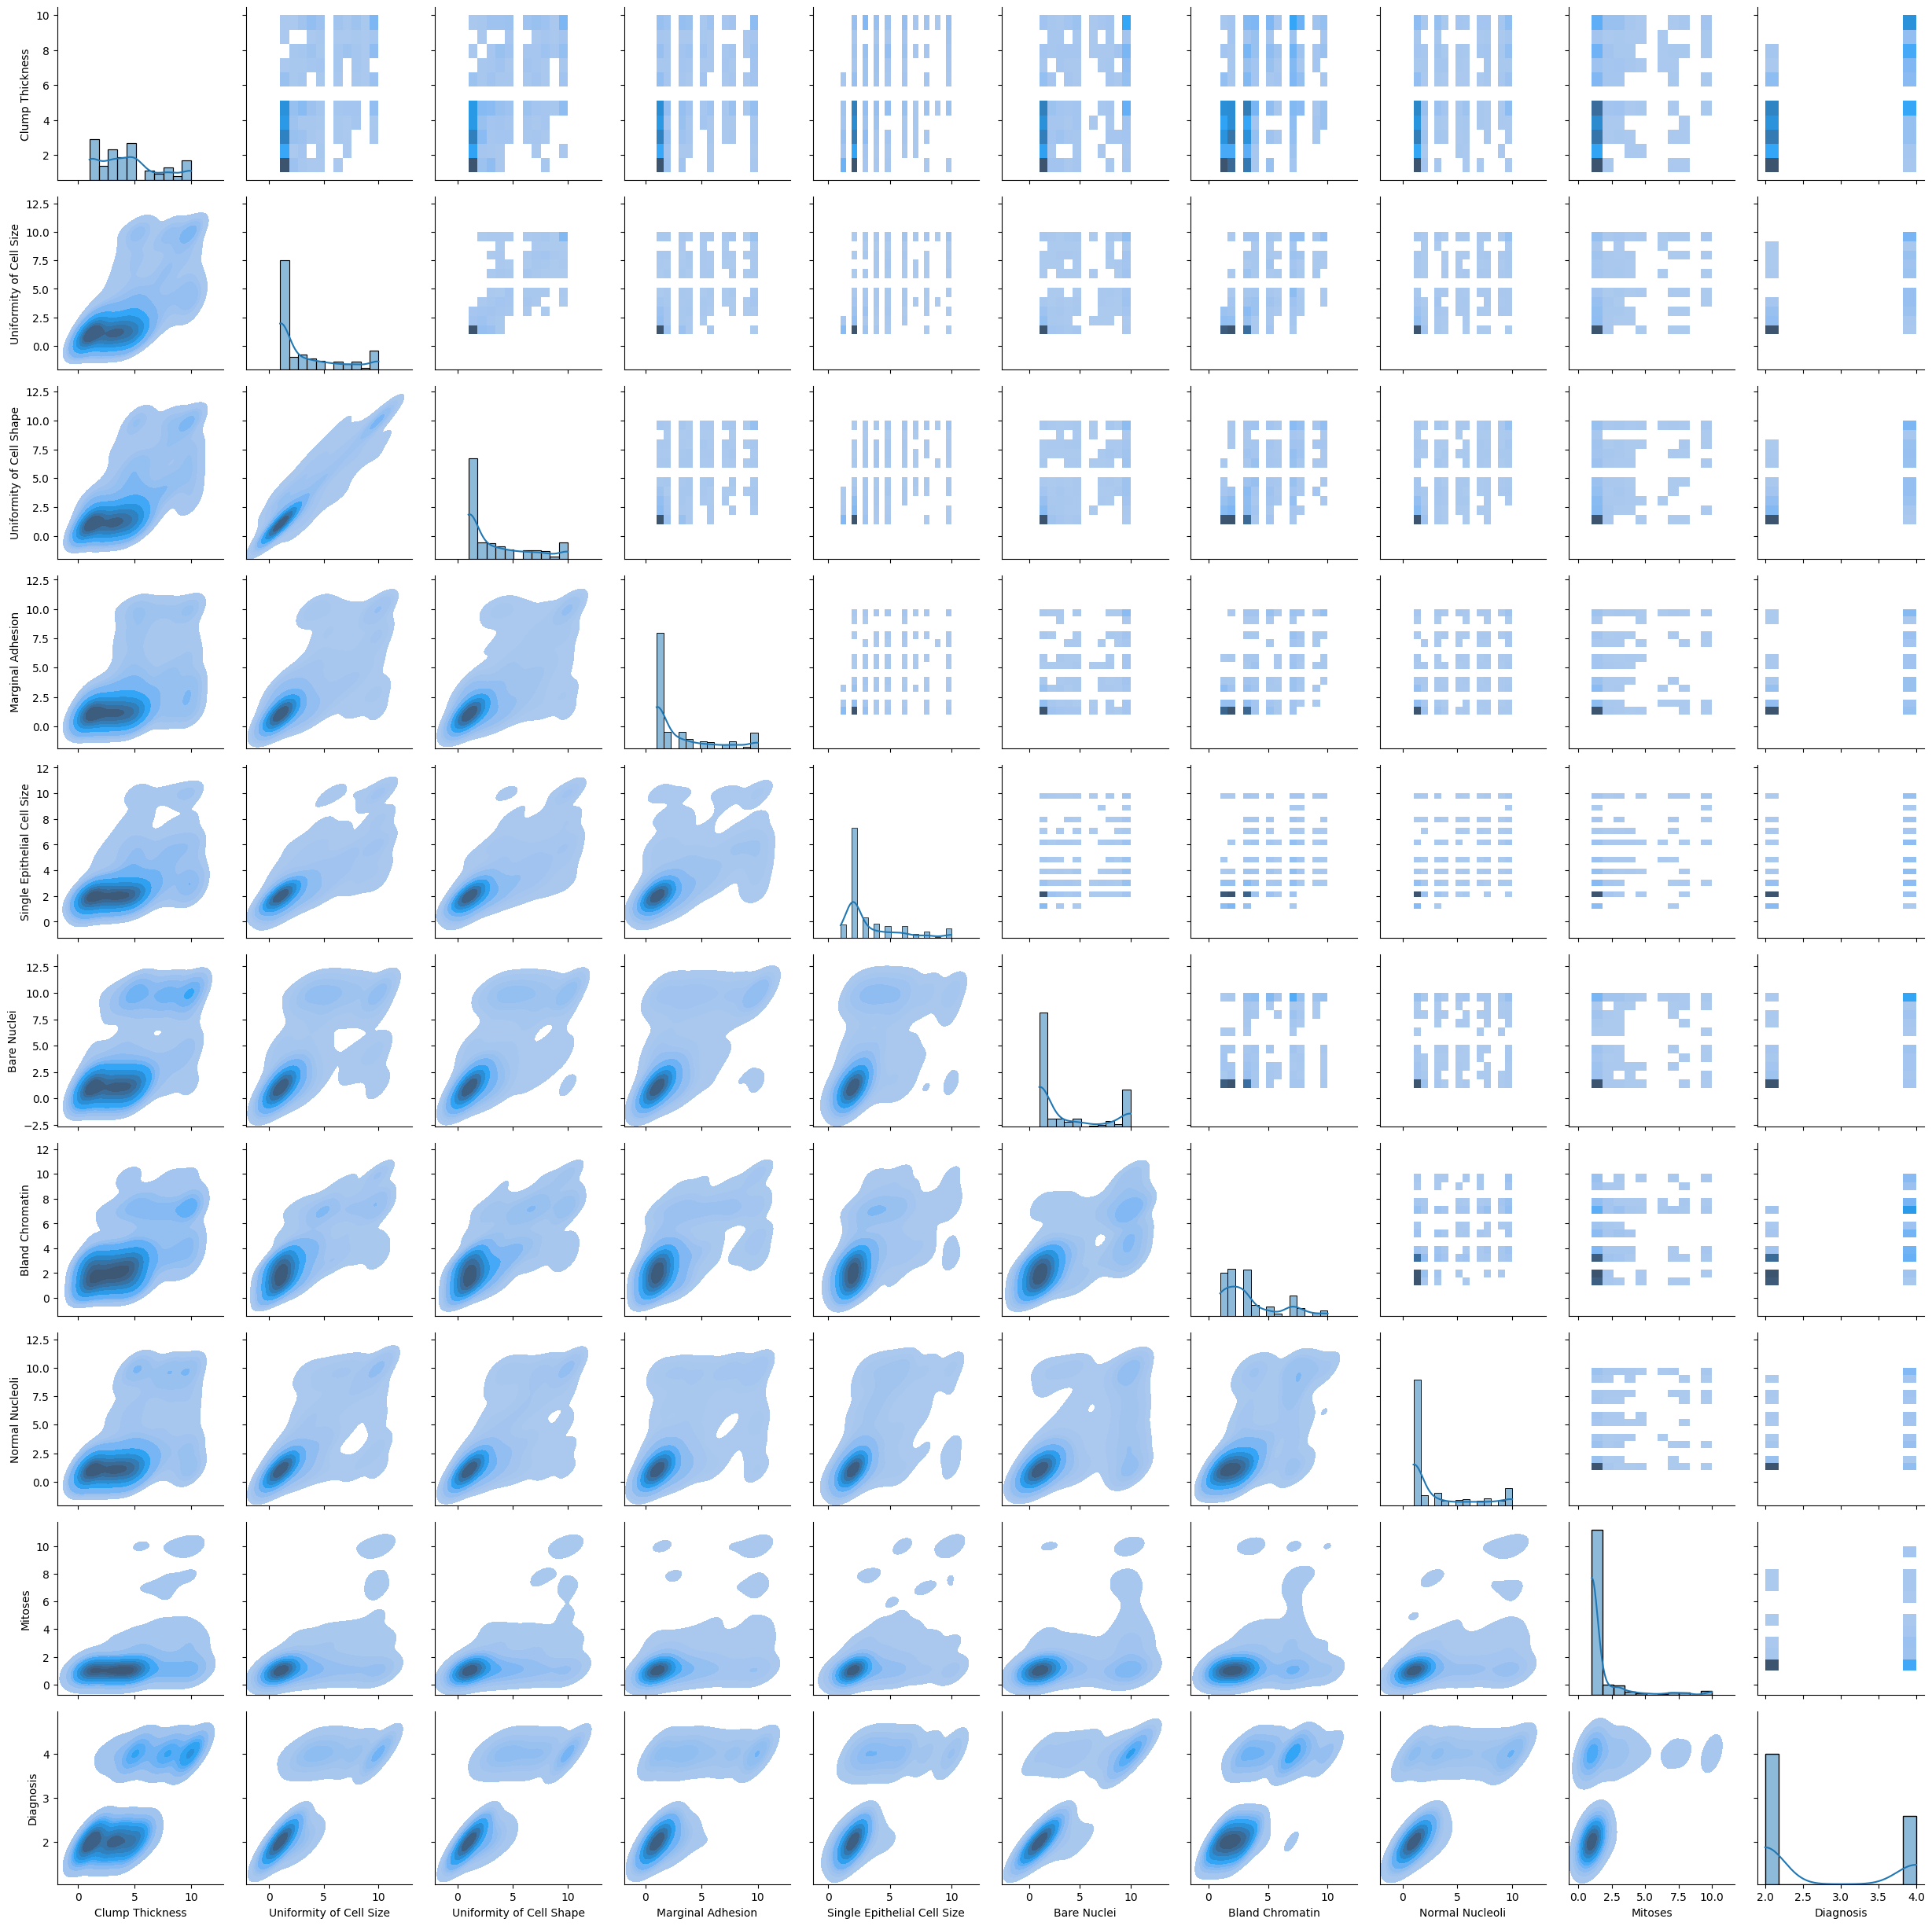

In [7]:
g = sns.PairGrid(wisconsinDiagnosis0[wisconsinDiagnosis0.columns[1:]])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# id number is not unique

In [8]:
np.unique(wisconsinDiagnosis0["id number"]).shape

(645,)

In [9]:
features = ["radius", "texture", "perimeter", "area", "smothness", "compactness", "concavity", "concave points", "symmetry", "fractal dimension"]
names = np.hstack(list(zip(*[["Mean " + i, "STD " + i, "Worst " + i] for i in features])))
print(["id number", "Diagnosis"] + list(names))

['id number', 'Diagnosis', 'Mean radius', 'Mean texture', 'Mean perimeter', 'Mean area', 'Mean smothness', 'Mean compactness', 'Mean concavity', 'Mean concave points', 'Mean symmetry', 'Mean fractal dimension', 'STD radius', 'STD texture', 'STD perimeter', 'STD area', 'STD smothness', 'STD compactness', 'STD concavity', 'STD concave points', 'STD symmetry', 'STD fractal dimension', 'Worst radius', 'Worst texture', 'Worst perimeter', 'Worst area', 'Worst smothness', 'Worst compactness', 'Worst concavity', 'Worst concave points', 'Worst symmetry', 'Worst fractal dimension']


In [10]:
wisconsinDiagnosis1 = pd.read_csv("../data/wdbc.csv", names=["id number", "Diagnosis"] + list(names), na_values=["?"])

In [11]:
wisconsinDiagnosis1

,id number,Diagnosis,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# wisconsinDiagnosis1 has unique id numbers

In [12]:
len(np.unique(wisconsinDiagnosis1["id number"])) == len(wisconsinDiagnosis1["id number"])

True

In [13]:
wisconsinDiagnosis1.describe()

,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<AxesSubplot: title={'center': 'id number'}>,
        <AxesSubplot: title={'center': 'Mean radius'}>,
        <AxesSubplot: title={'center': 'Mean texture'}>,
        <AxesSubplot: title={'center': 'Mean perimeter'}>,
        <AxesSubplot: title={'center': 'Mean area'}>,
        <AxesSubplot: title={'center': 'Mean smothness'}>],
       [<AxesSubplot: title={'center': 'Mean compactness'}>,
        <AxesSubplot: title={'center': 'Mean concavity'}>,
        <AxesSubplot: title={'center': 'Mean concave points'}>,
        <AxesSubplot: title={'center': 'Mean symmetry'}>,
        <AxesSubplot: title={'center': 'Mean fractal dimension'}>,
        <AxesSubplot: title={'center': 'STD radius'}>],
       [<AxesSubplot: title={'center': 'STD texture'}>,
        <AxesSubplot: title={'center': 'STD perimeter'}>,
        <AxesSubplot: title={'center': 'STD area'}>,
        <AxesSubplot: title={'center': 'STD smothness'}>,
        <AxesSubplot: title={'center': 'STD compactness'}>,
        <A

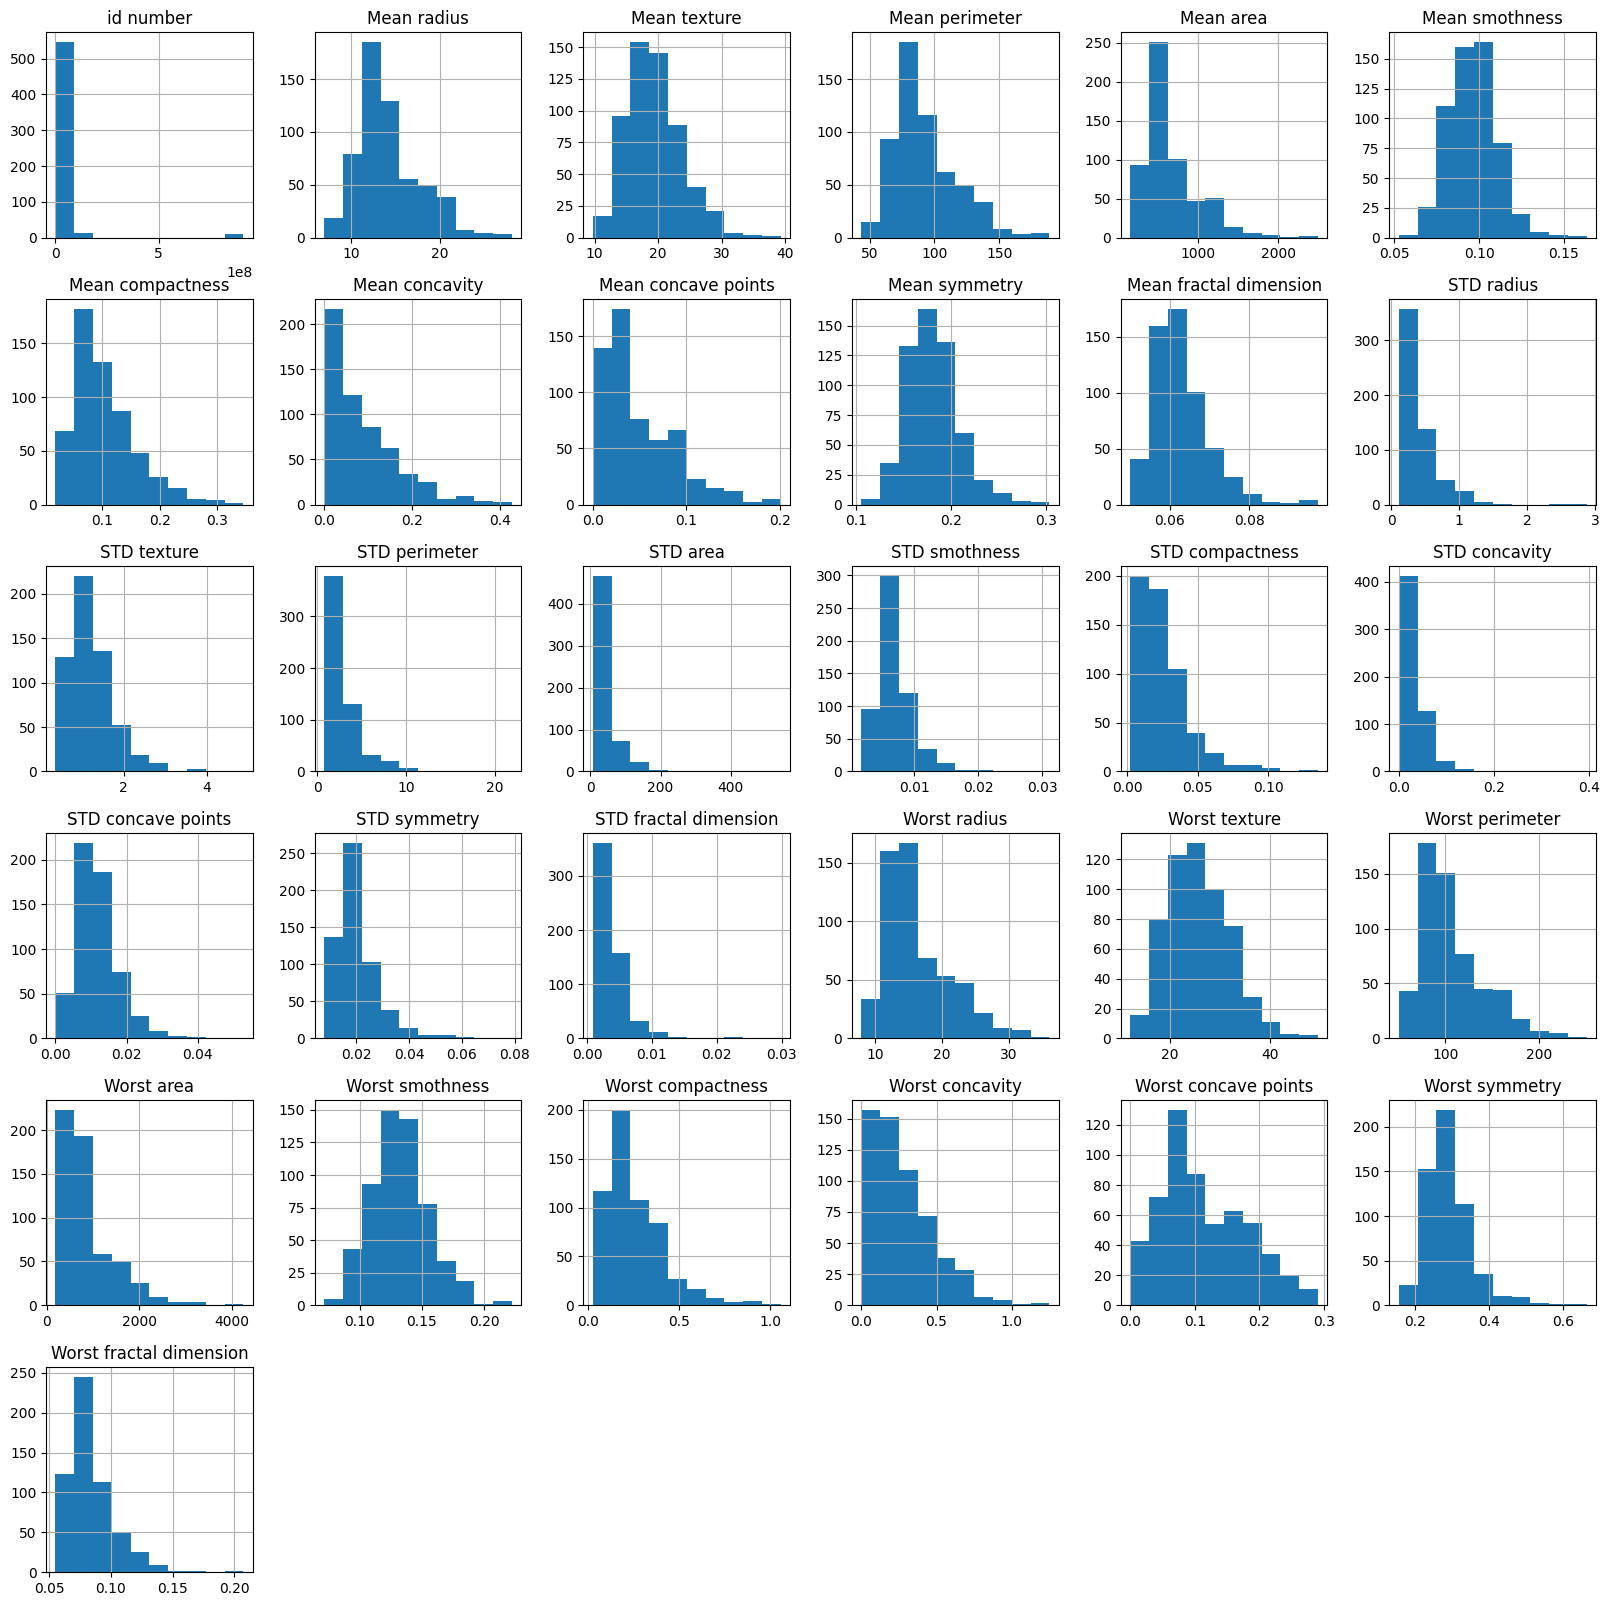

In [14]:
wisconsinDiagnosis1.hist()

In [15]:
wisconsinDiagnosis1.isna().astype(int).sum()

id number                  0
Diagnosis                  0
Mean radius                0
Mean texture               0
Mean perimeter             0
Mean area                  0
Mean smothness             0
Mean compactness           0
Mean concavity             0
Mean concave points        0
Mean symmetry              0
Mean fractal dimension     0
STD radius                 0
STD texture                0
STD perimeter              0
STD area                   0
STD smothness              0
STD compactness            0
STD concavity              0
STD concave points         0
STD symmetry               0
STD fractal dimension      0
Worst radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smothness            0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
dtype: int64

In [16]:
wisconsinRecurrence = pd.read_csv("../data/wpbc.csv", names=["id number", "Recurrence", "Time"] + list(names) + ["Tumour Size", "Lymph node status"] , na_values=["?"])

In [17]:
wisconsinRecurrence

,id number,Recurrence,Time,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,...,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN


array([[<AxesSubplot: title={'center': 'id number'}>,
        <AxesSubplot: title={'center': 'Time'}>,
        <AxesSubplot: title={'center': 'Mean radius'}>,
        <AxesSubplot: title={'center': 'Mean texture'}>,
        <AxesSubplot: title={'center': 'Mean perimeter'}>,
        <AxesSubplot: title={'center': 'Mean area'}>],
       [<AxesSubplot: title={'center': 'Mean smothness'}>,
        <AxesSubplot: title={'center': 'Mean compactness'}>,
        <AxesSubplot: title={'center': 'Mean concavity'}>,
        <AxesSubplot: title={'center': 'Mean concave points'}>,
        <AxesSubplot: title={'center': 'Mean symmetry'}>,
        <AxesSubplot: title={'center': 'Mean fractal dimension'}>],
       [<AxesSubplot: title={'center': 'STD radius'}>,
        <AxesSubplot: title={'center': 'STD texture'}>,
        <AxesSubplot: title={'center': 'STD perimeter'}>,
        <AxesSubplot: title={'center': 'STD area'}>,
        <AxesSubplot: title={'center': 'STD smothness'}>,
        <AxesSubplot:

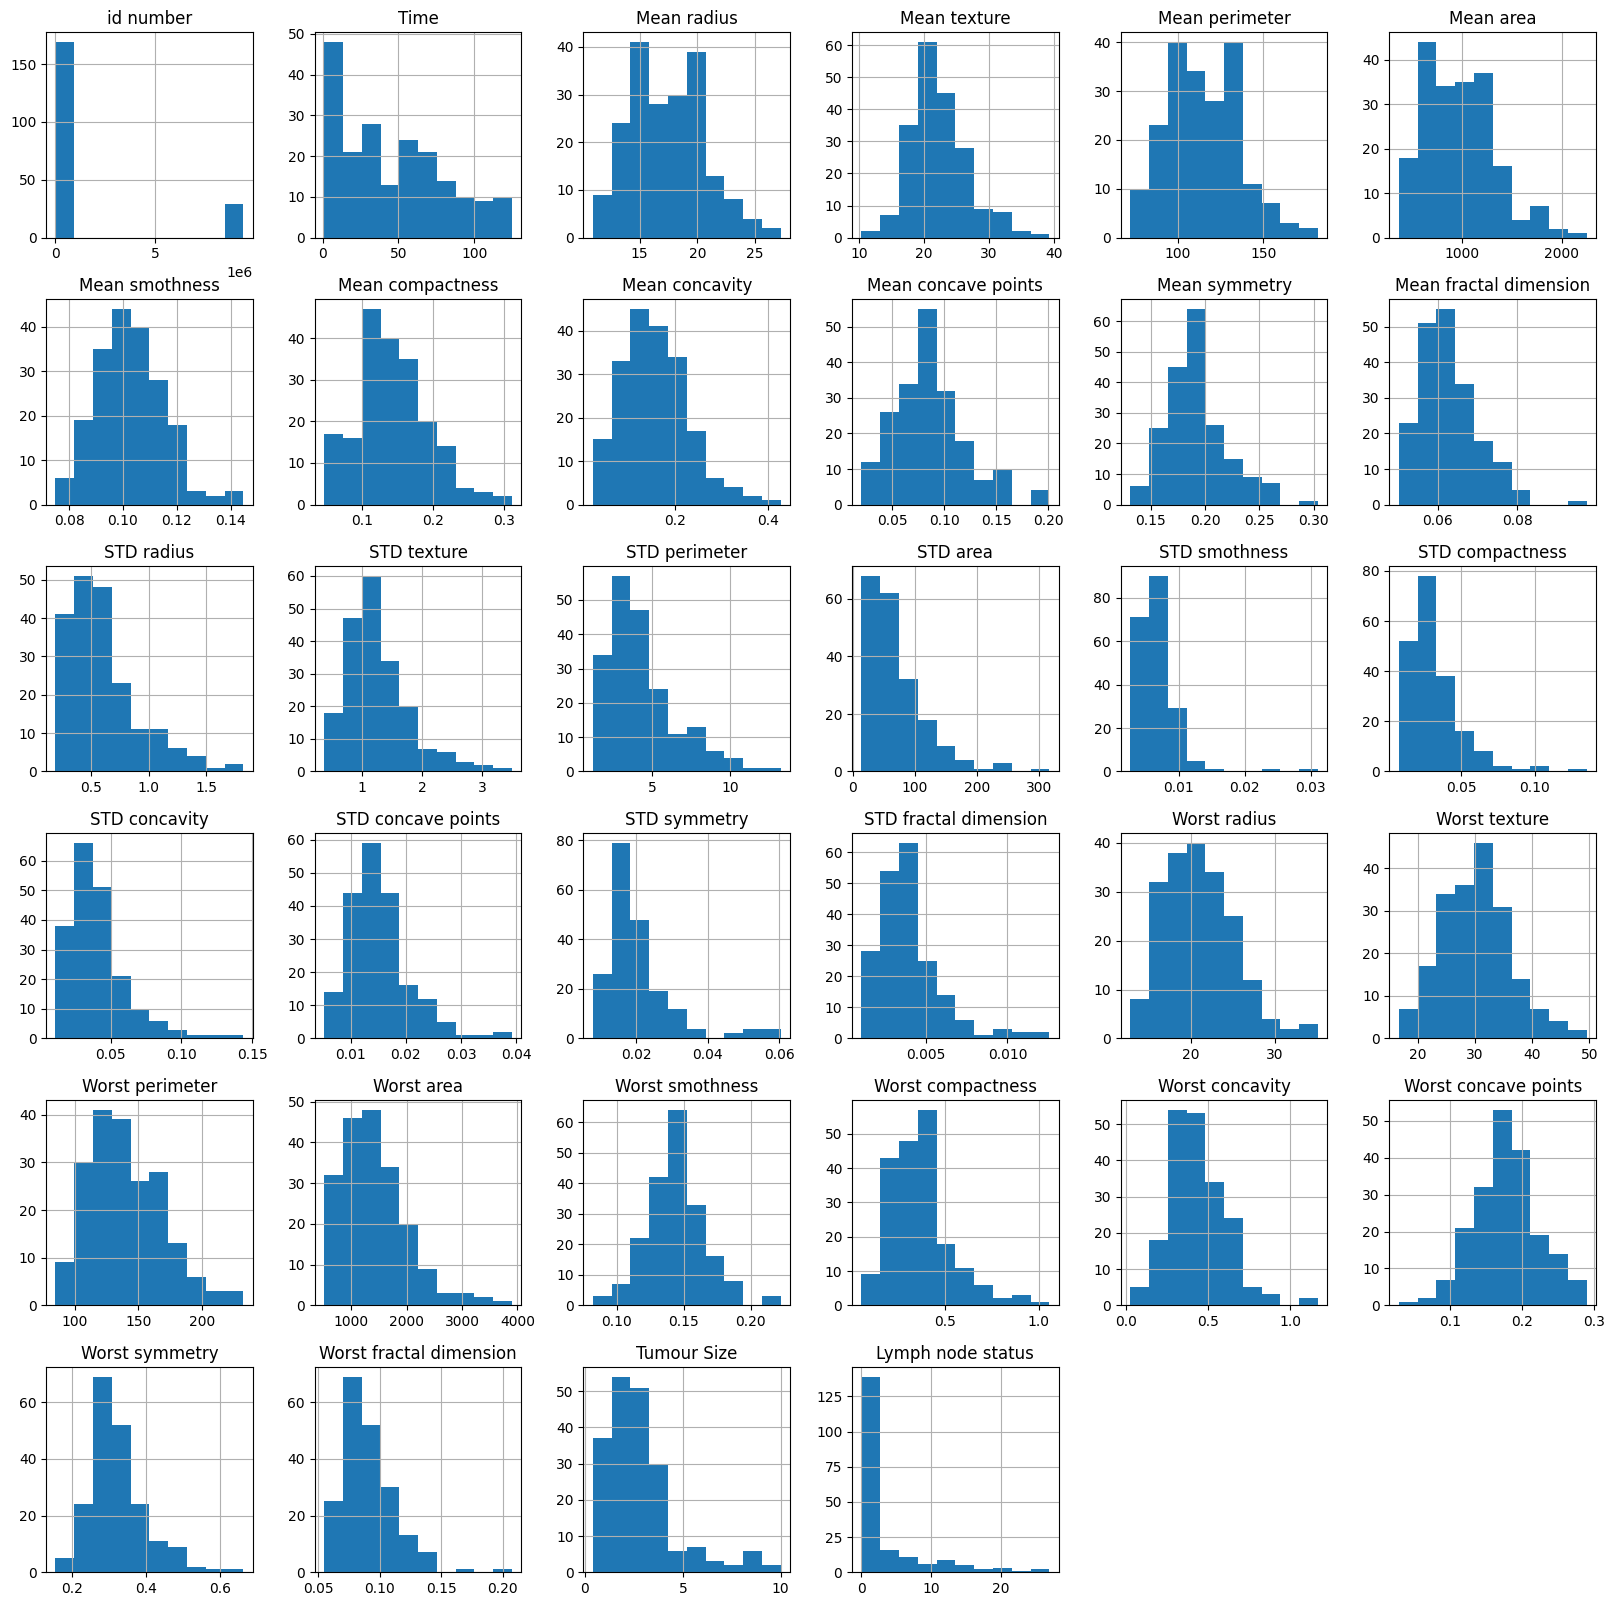

In [18]:
wisconsinRecurrence.hist()

In [19]:
wisconsinRecurrence.isna().astype(int).sum()

id number                  0
Recurrence                 0
Time                       0
Mean radius                0
Mean texture               0
Mean perimeter             0
Mean area                  0
Mean smothness             0
Mean compactness           0
Mean concavity             0
Mean concave points        0
Mean symmetry              0
Mean fractal dimension     0
STD radius                 0
STD texture                0
STD perimeter              0
STD area                   0
STD smothness              0
STD compactness            0
STD concavity              0
STD concave points         0
STD symmetry               0
STD fractal dimension      0
Worst radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smothness            0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Tumour Size                0
Lymph node sta

# 

In [20]:
sum([1 for i in wisconsinDiagnosis1['id number'].to_numpy() if i in wisconsinRecurrence["id number"].to_numpy()])

139

# wisconsinRecurrence has unique id numbers

In [21]:
len(np.unique(wisconsinRecurrence["id number"])) == len(wisconsinRecurrence["id number"])

True

<AxesSubplot: >

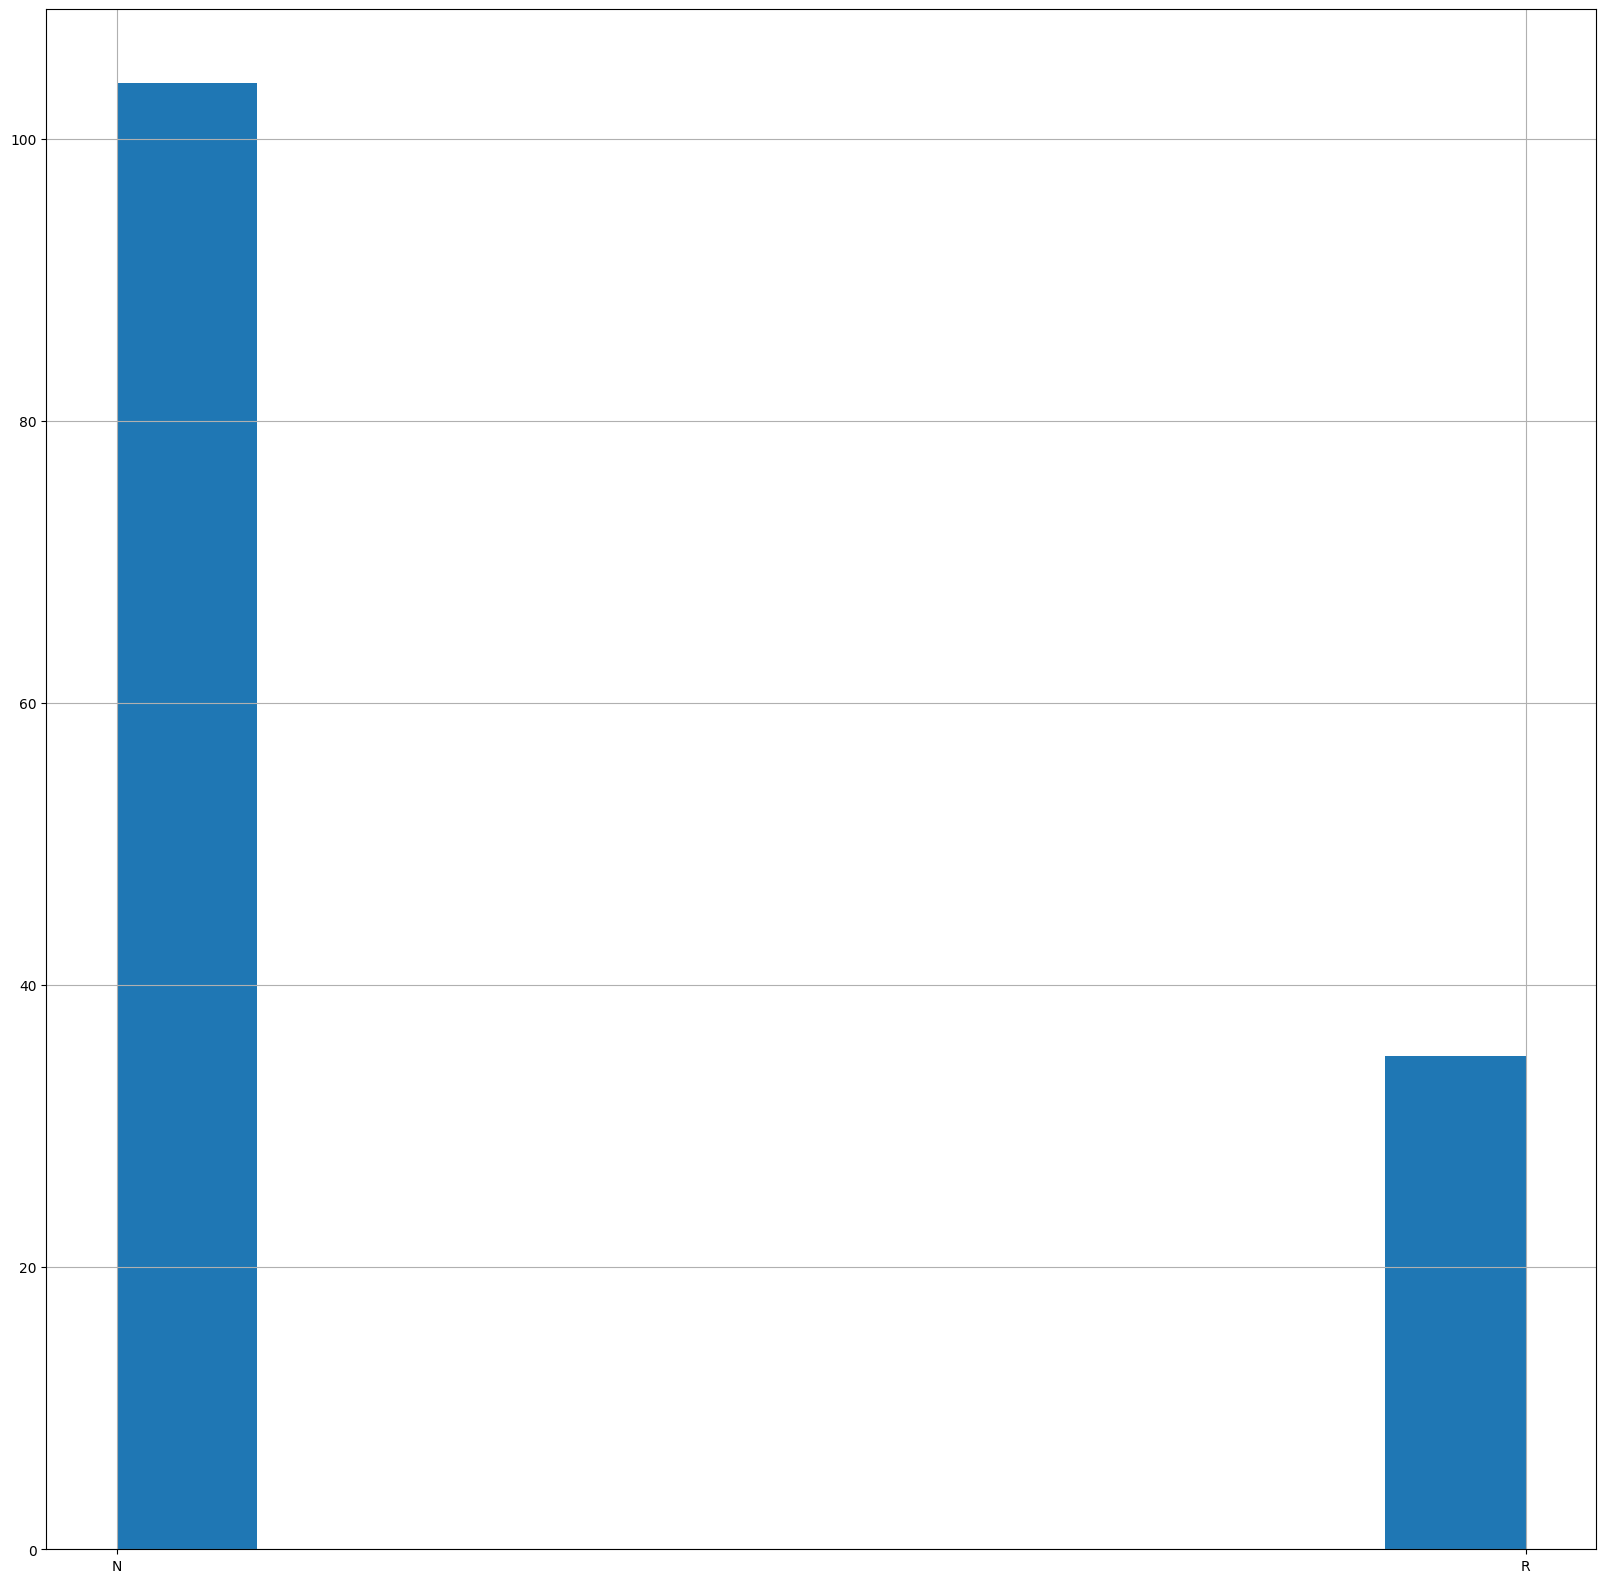

In [22]:
wisconsinRecurrence.set_index("id number").loc[[i for i in wisconsinDiagnosis1['id number'].to_numpy() if i in wisconsinRecurrence["id number"].to_numpy()], "Recurrence"].hist()

# multilabel classifications is not possible

<AxesSubplot: >

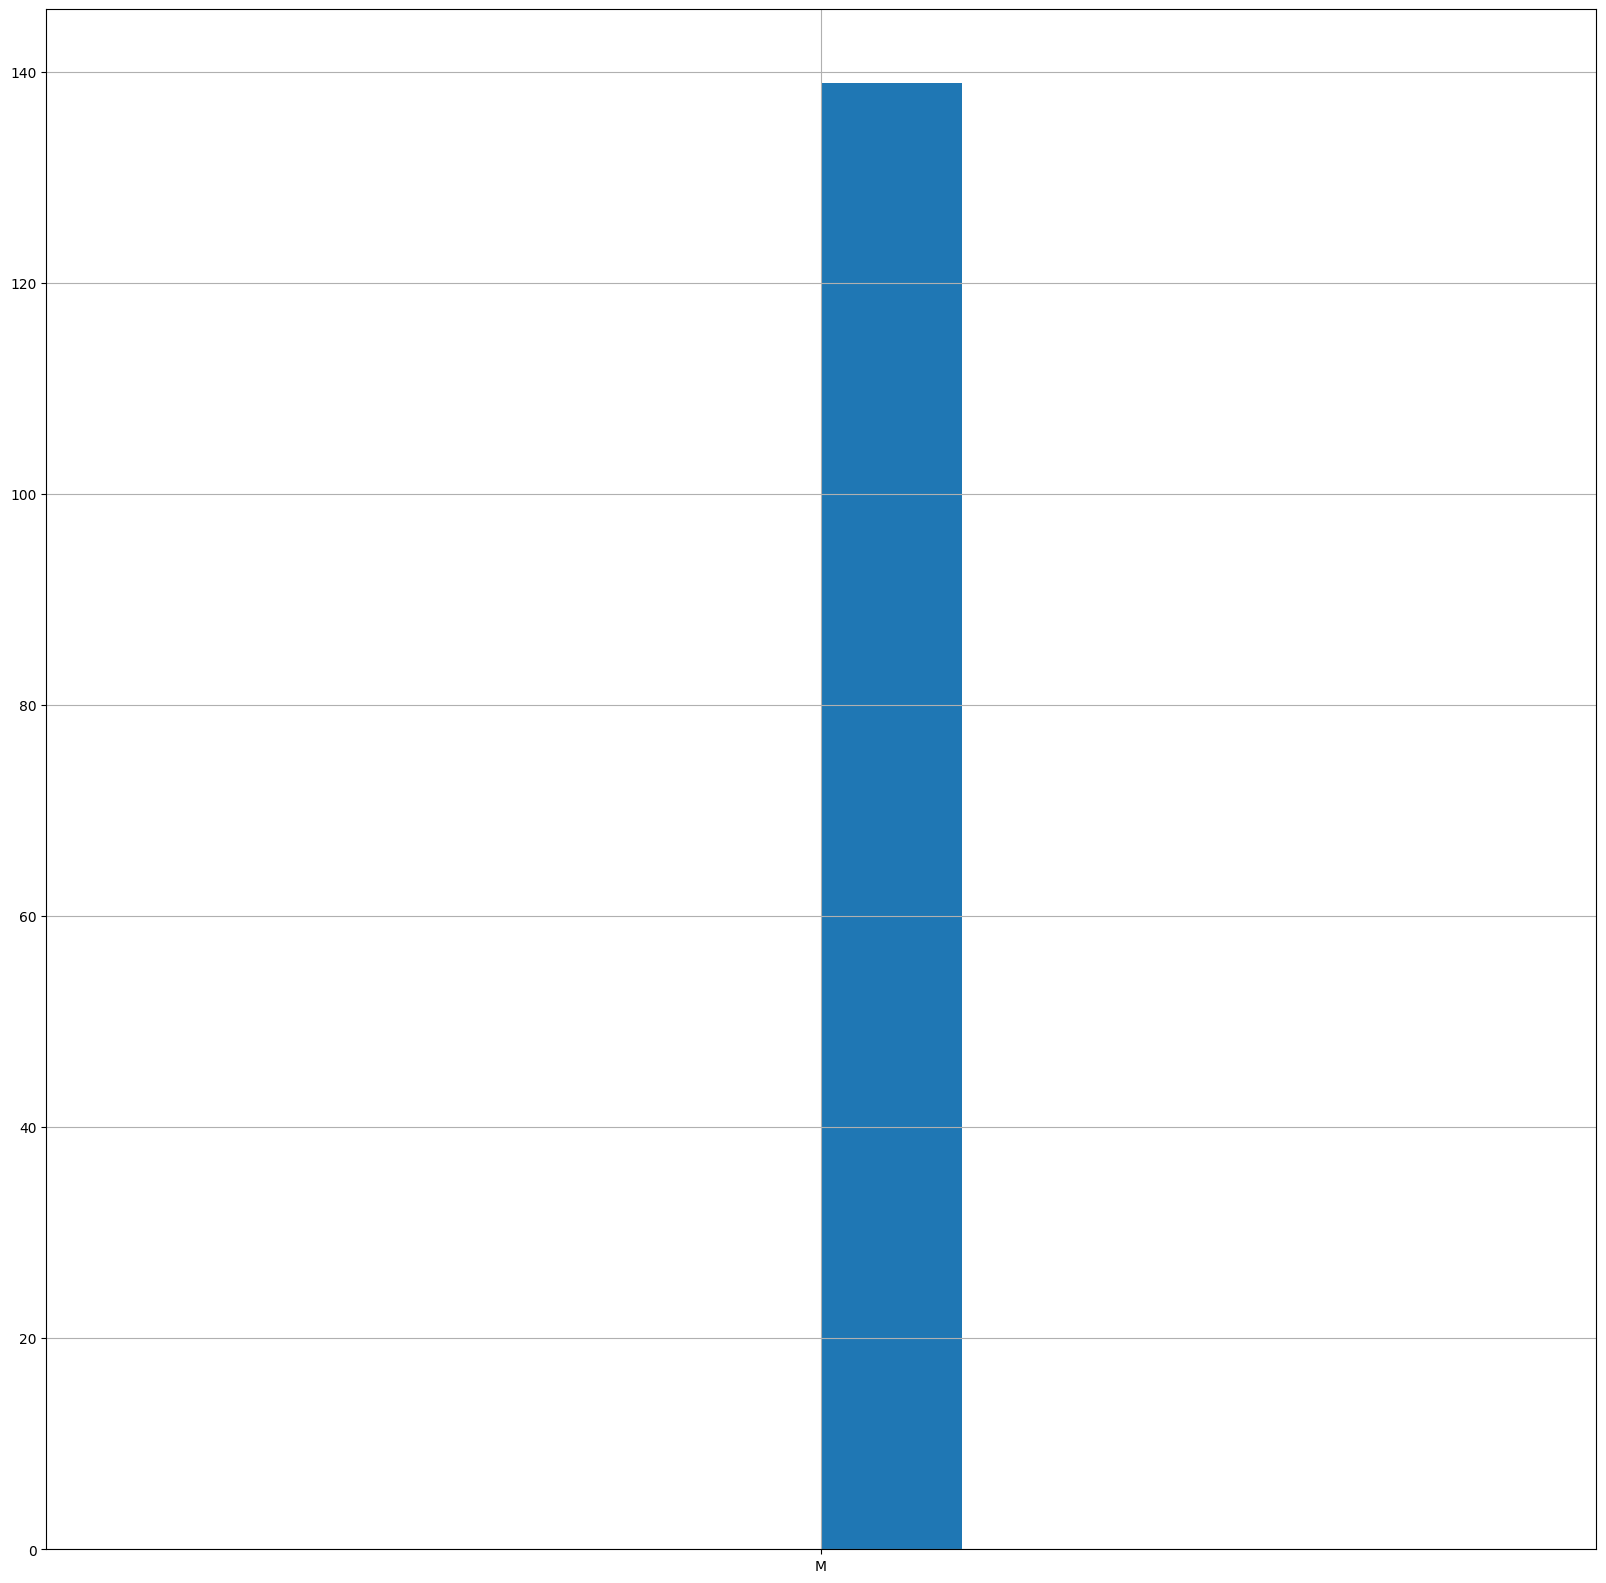

In [23]:
wisconsinDiagnosis1.set_index("id number").loc[[i for i in wisconsinDiagnosis1['id number'].to_numpy() if i in wisconsinRecurrence["id number"].to_numpy()], "Diagnosis"].hist()

In [24]:
dignosis = wisconsinDiagnosis1.Diagnosis

In [25]:
wisconsinDiagnosis1.pop("Diagnosis")

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

In [26]:
wisconsinDiagnosis1.set_index("id number")

,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
id number,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [27]:
recurrence = wisconsinRecurrence.Recurrence

In [28]:
wisconsinRecurrence.pop("Recurrence")

0      N
1      N
2      N
3      N
4      R
      ..
193    N
194    N
195    N
196    R
197    N
Name: Recurrence, Length: 198, dtype: object

In [29]:
time = wisconsinRecurrence.Time

In [30]:
wisconsinRecurrence.pop("Time")

0       31
1       61
2      116
3      123
4       27
      ... 
193     10
194      8
195     12
196      3
197      6
Name: Time, Length: 198, dtype: int64

In [31]:
wisconsinRecurrence = wisconsinRecurrence.set_index("id number")

In [32]:
wisconsinRecurrence

,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,...,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status
id number,,,,,,,,,,,,,,,,,,,,,
119513,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
8423,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
842517,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
843483,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
843584,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942640,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
943471,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
94547,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0


In [33]:
from sklearn.impute import KNNImputer

# Fill missing values in Lymph node status

In [34]:
from sklearn.impute import MissingIndicator

## 4 Missing values

In [35]:
sum(MissingIndicator().fit_transform(wisconsinRecurrence))

/home/mrbluesky/pg/python-env-for-ml-project/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


array([4])

In [36]:
wisconsinRecurrence["Lymph node status"]

id number
119513    5.0
8423      2.0
842517    0.0
843483    0.0
843584    0.0
         ... 
942640    2.0
943471    0.0
94547     0.0
947204    NaN
947489    0.0
Name: Lymph node status, Length: 198, dtype: float64

In [37]:
KNNImputer(n_neighbors=4).fit_transform(wisconsinRecurrence)

/home/mrbluesky/pg/python-env-for-ml-project/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/home/mrbluesky/pg/python-env-for-ml-project/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


array([[1.802e+01, 2.760e+01, 1.175e+02, ..., 8.113e-02, 5.000e+00,
        5.000e+00],
       [1.799e+01, 1.038e+01, 1.228e+02, ..., 1.189e-01, 3.000e+00,
        2.000e+00],
       [2.137e+01, 1.744e+01, 1.375e+02, ..., 9.067e-02, 2.500e+00,
        0.000e+00],
       ...,
       [1.717e+01, 2.919e+01, 1.100e+02, ..., 6.033e-02, 3.700e+00,
        0.000e+00],
       [2.142e+01, 2.284e+01, 1.450e+02, ..., 8.981e-02, 3.000e+00,
        5.250e+00],
       [1.670e+01, 2.813e+01, 1.103e+02, ..., 8.036e-02, 3.500e+00,
        0.000e+00]])

In [38]:
wisconsinRecurrence.columns = wisconsinRecurrence.columns.astype(str)

In [39]:
data = KNNImputer(n_neighbors=4).fit_transform(wisconsinRecurrence)

In [40]:
data = pd.DataFrame(data, index=wisconsinRecurrence.index, columns=wisconsinRecurrence.columns)

In [41]:
data.loc[:, "Lymph node status"] 

id number
119513    5.00
8423      2.00
842517    0.00
843483    0.00
843584    0.00
          ... 
942640    2.00
943471    0.00
94547     0.00
947204    5.25
947489    0.00
Name: Lymph node status, Length: 198, dtype: float64

In [42]:
data.loc[:, "Lymph node status"] = data.loc[:, "Lymph node status"].astype(int)

/tmp/ipykernel_710712/2655146893.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "Lymph node status"] = data.loc[:, "Lymph node status"].astype(int)


In [43]:
data.loc[:, "Lymph node status"] 

id number
119513    5
8423      2
842517    0
843483    0
843584    0
         ..
942640    2
943471    0
94547     0
947204    5
947489    0
Name: Lymph node status, Length: 198, dtype: int64

In [44]:
data

,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,...,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status
id number,,,,,,,,,,,,,,,,,,,,,
119513,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
8423,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
842517,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
843483,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
843584,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942640,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
943471,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
94547,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0


In [45]:
time

0       31
1       61
2      116
3      123
4       27
      ... 
193     10
194      8
195     12
196      3
197      6
Name: Time, Length: 198, dtype: int64

In [46]:
recurrence

0      N
1      N
2      N
3      N
4      R
      ..
193    N
194    N
195    N
196    R
197    N
Name: Recurrence, Length: 198, dtype: object

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
dataValues = StandardScaler().fit_transform(data)

In [49]:
dataValues

array([[ 0.19268806,  1.24176957,  0.12393421, ..., -0.45922582,
         1.11353031,  0.3345963 ],
       [ 0.18317537, -2.77463023,  0.37241829, ...,  1.32925886,
         0.07890337, -0.21902543],
       [ 1.25493866, -1.12795296,  1.06160997, ..., -0.00748783,
        -0.17975337, -0.58810659],
       ...,
       [-0.07683821,  1.61262181, -0.22769419, ..., -1.44414722,
         0.4410228 , -0.58810659],
       [ 1.27079314,  0.13154523,  1.41323838, ..., -0.04821054,
         0.07890337,  0.3345963 ],
       [-0.22587038,  1.36538698, -0.21362906, ..., -0.49568685,
         0.3375601 , -0.58810659]])

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
target = LabelEncoder().fit_transform(recurrence)

In [52]:
target

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [55]:
data = pd.DataFrame(dataValues, columns=data.columns, index= data.index)

In [62]:
data["Recurrence"] = recurrence.to_numpy()

In [63]:
data["Time"] = time.to_numpy()

In [64]:
data

,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,...,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status,Recurrence,Time
id number,,,,,,,,,,,,,,,,,,,,,
119513,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,-0.480176,-0.228521,0.086480,...,-1.112648,-1.054732,-0.708404,-1.370815,-0.743009,-0.459226,1.113530,0.334596,N,31
8423,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,1.785222,1.795777,2.216313,...,0.832831,1.837343,1.589132,1.922113,1.823321,1.329259,0.078903,-0.219025,N,61
842517,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,-0.147247,1.481536,-0.360812,...,-1.144541,-0.123520,-0.550192,0.541923,1.467183,-0.007488,-0.179753,-0.588107,N,116
843483,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,0.545246,2.446183,4.810056,...,3.001561,3.064487,1.444778,1.746815,4.540377,3.891002,-0.438410,-0.588107,N,123
843584,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,0.518612,-0.433143,-0.536682,...,-0.297096,-0.978914,-0.211827,-0.361191,-1.160505,-0.665207,0.337560,-0.588107,R,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942640,1.619592,-0.083036,1.502318,1.784892,-2.142495,-1.025242,-1.244751,-0.683780,-0.729114,-1.396647,...,-2.825307,-1.425871,-1.911738,-1.886056,-1.564662,-1.560160,1.630844,-0.219025,N,10
943471,-0.625403,2.076770,-0.649648,-0.653766,-0.695827,-0.732303,-0.266256,-0.644421,-0.703536,-0.229255,...,-0.761824,-0.788147,-0.803677,-1.113416,-0.426886,-0.501369,-0.697067,-0.588107,N,8
94547,-0.076838,1.612622,-0.227694,-0.155842,-1.053691,-1.528945,-1.284385,-1.068203,-0.491606,-1.216623,...,-0.811941,-1.271179,-1.285242,-1.854547,0.170679,-1.444147,0.441023,-0.588107,N,12


In [66]:
data.to_excel("data.xlsx")